In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import random

In [4]:
# main_dir = "competitive-data-science-predict-future-sales"
main_dir = "/content/drive/My Drive/predict_future_sales/competitive-data-science-predict-future-sales"

In [5]:
X = np.load(f"{main_dir}/X.npy")
# X = np.load(f"{main_dir}/X_(1).npy")
# X = np.delete(X, 1, 1).astype('int')
print(X.shape)
X

(214200, 2, 33)


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 3.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.49900000e+03, 9.99166667e+02, 7.49500000e+02]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 3.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.99000000e+02, 9.99000000e+02]],

       ...,

       [[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.99000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000

In [6]:
Y = np.load(f"{main_dir}/Y.npy")
Y = Y.reshape((214200, 1))
print(Y.shape)
Y

(214200, 1)


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# put it in

In [ ]:
# https://medium.com/@kushal.sharma/lstm-network-using-keras-for-sequence-prediction-550b5bebae2c

In [7]:
# create train and test sets for X and Y

# train_size = int(len(X) * 0.67) 
# test_size = len(X) - train_size 
# train_x, test_x = X[0:train_size,:], X[train_size:len(X), :]
# train_y, test_y = Y[0:train_size,:], Y[train_size:len(Y), :]

bool_arr = np.random.choice([True, False], size=len(X), replace=True, p=[0.67, 0.33])
inverse_bool_arr = np.invert(bool_arr)

print(bool_arr.shape, bool_arr)
unique, counts = np.unique(bool_arr, return_counts=True)
print(np.asarray((unique, counts)).T)

train_x, test_x = X[bool_arr], X[inverse_bool_arr]
train_y, test_y = Y[bool_arr], Y[inverse_bool_arr]

(214200,) [ True  True  True ...  True  True  True]
[[     0  71096]
 [     1 143104]]


In [8]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(143104, 2, 33) (71096, 2, 33) (143104, 1) (71096, 1)


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense 
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
def lstm():
  model = Sequential()
  model.add(LSTM(8, input_shape=(2,33))) 
  model.add(Dense(1)) 
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  return model

In [11]:
# model_path = f"{main_dir}/model.h5"
model_path = f"{main_dir}/model_0.h5"
# model_path = f"{main_dir}/model_1.h5"
# model_path = f"{main_dir}/model_2.h5"

In [13]:
try:
  # model = load_model(model_path)
  model = load_model('none')
  history = np.load(f"{main_dir}/model_history.npy",allow_pickle='TRUE').item()
except OSError:
  print(f"No file or directory found at {model_path}\nBuilding model..........")
  model = lstm()
  # history = model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(test_x, test_y), verbose=1)
  history = model.fit(train_x, train_y, epochs=100, batch_size=100, verbose=1)
  model.save(model_path)
  np.save(f"{main_dir}/model_history.npy",history.history)
  history = np.load(f"{main_dir}/model_history.npy",allow_pickle='TRUE').item()

No file or directory found at /content/drive/My Drive/predict_future_sales/competitive-data-science-predict-future-sales/model_0.h5
Building model..........
Epoch 1/100
1432/1432 [==============================] - 5s 2ms/step - loss: 7.6228
Epoch 2/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.5652
Epoch 3/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.5333
Epoch 4/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.5275
Epoch 5/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.5117
Epoch 6/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.4942
Epoch 7/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.4657
Epoch 8/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.4447
Epoch 9/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.4261
Epoch 10/100
1432/1432 [==============================] - 3s 2ms/step - loss: 7.4053
Ep

In [15]:
history.keys()

dict_keys(['loss'])

In [16]:
# make predictions 
train_predict = model.predict(train_x) 
test_predict = model.predict(test_x)

2222/2222 [==============================] - 3s 1ms/step


In [17]:
train_predict_int = train_predict.round(0)
test_predict_int = test_predict.round(0)

In [18]:
print(np.sum(train_y == train_predict_int)/len(train_y))
print(np.sum(test_y == test_predict_int)/len(test_y))

0.8401232669946332
0.8376279959491392


In [19]:
print('Train Mean Absolute Error:', mean_absolute_error(train_y, train_predict))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(train_y, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(test_y, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(test_y, test_predict)))

Train Mean Absolute Error: 0.38505644555668445
Train Root Mean Squared Error: 2.5193676088256547
Test Mean Absolute Error: 0.4206978232724817
Test Root Mean Squared Error: 8.69808036870004


In [22]:
normalized_rmse = np.sqrt(mean_squared_error(test_y, test_predict))/(max(test_y)-min(test_y))
normalized_rmse

array([0.00385895])

KeyError: ignored

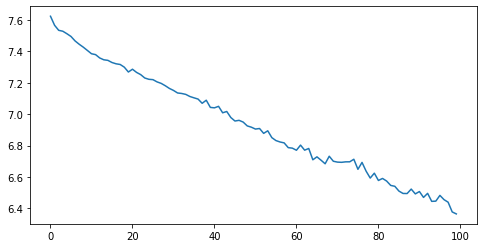

In [20]:
plt.figure(figsize=(8,4))
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
# combine x and y for normalizing

def combine_x_y(x, y):
    ww = []
    ft = X.shape[1]
    for i in tqdm(range(len(x))):
      if ft == 5:
        ggi = [y[i][0], 0, x[i][2][0], x[i][3][0], x[i][4][0]]
      elif ft == 2: 
        ggi = [y[i][0], 0]
      elif ft == 1:
        ggi = [y[i][0]]
        ww.append(ggi)
    ww = np.array(ww, dtype='float32').reshape(214200, ft, 1)
    bg = np.concatenate([x, ww], axis=2)
    return bg

In [ ]:
combined = combine_x_y(X, Y)
print(combined.shape)
combined

100%|██████████| 214200/214200 [00:00<00:00, 453211.82it/s]

(214200, 1, 34)


array([[[0., 0., 0., ..., 3., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 3., 1.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
# combined_predict = model.predict(combined).round(0)
# combined_predict

In [ ]:
# combined_predict.astype('int')

In [ ]:
good_game = np.delete(combined, 0, 2)

In [ ]:
gg = model.predict(good_game).round(0)
gg

6694/6694 [==============================] - 12s 2ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
np.unique(gg, return_counts=True)

(array([-10.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  30.,  31.,  32.,  36.,  39.,  40.],
       dtype=float32),
 array([     1,      1,      1,      2,     12,     12,     36,     66,
           320, 198804,  10544,   1909,    710,    610,    278,    293,
           148,     82,     65,     41,     44,     30,     18,     13,
            20,     23,     16,     14,      9,     36,      6,      5,
             6,      6,      2,      2,      2,      5,      1,      1,
             3,      1,      1,      1]))

In [ ]:
np.unique(np.array([0.45, 0.77, 9.77]).round(0))

array([ 0.,  1., 10.])

In [ ]:
np.unique(train_predict_int)

array([-5., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
        9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.,
       22., 23., 24., 25., 26., 28., 31., 32., 33.], dtype=float32)

In [ ]:
# Sample submission file
df = pd.read_csv(f"{main_dir}/sample_submission.csv")
df

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [ ]:
df['item_cnt_month'] = gg
df

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
214195,214195,0.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0


In [ ]:
sav_path = f"{main_dir}/result.csv"

In [ ]:
df.to_csv(sav_path, index=False)

In [ ]:
pd.read_csv(sav_path)

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
214195,214195,0.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0


In [ ]:
combined_predict = model.predict(combined).round(0)

6694/6694 [==============================] - 12s 2ms/step


In [ ]:
cc = combined_predict.astype('int')

In [ ]:
np.unique(cc, return_counts=True)

(array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 31, 32, 33, 34]),
 array([     1,      1,      1,      8,     12,     12,     16,     30,
            90, 172929,  18462,   4226,   2528,   2424,   1659,   1229,
          1118,   1388,   1276,   1776,   1123,    854,   1307,    551,
           328,    230,    148,    110,     81,     66,     51,     57,
            29,     20,     24,     11,      2,      4,      1,      1,
             4,      2,     10]))

In [ ]:
# np.save(f"{main_dir}/cc.npy", cc)